# Predict No of Births on a Specific Day

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [12]:
df = pd.read_csv(r"./daily-total-female-births-CA.csv", parse_dates=["date"])

In [13]:
df.set_index(keys=["date"], inplace=True, drop=True)
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [88]:
df.groupby([df.index.day_name()]).births.count()

date
Friday       52
Monday       52
Saturday     52
Sunday       52
Thursday     53
Tuesday      52
Wednesday    52
Name: births, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='births', ylabel='Density'>

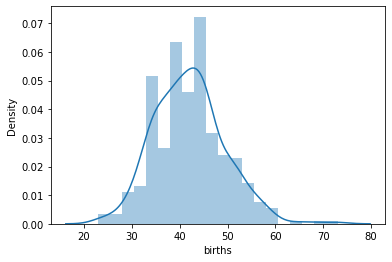

In [18]:
sns.distplot(df.births)

In [43]:
def test_for_stationality(df=df):
    means = df.births.rolling(window=10).mean()
    stds = df.births.rolling(window=10).std()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    means.plot(ax=ax[0], label="Rolling Mean", color="b")
    stds.plot(ax=ax[1], label="Rolling StandardDeviation", color="r")
    plt.legend()

    results = adfuller(df.births)
    labels = ["ADF Statistics", "P-value", "Lag Values", "No of Observations"]

    for l, r in zip(labels, results):
        print(f"{l} : {r}")

    return "Result : " + "Data is stationary" if results[1] <= 0.05 else "Data is non stationary"

ADF Statistics : -4.80829125355976
P-value : 5.243412990149949e-05
Lag Values : 6
No of Observations : 358


'Result : Data is stationary'

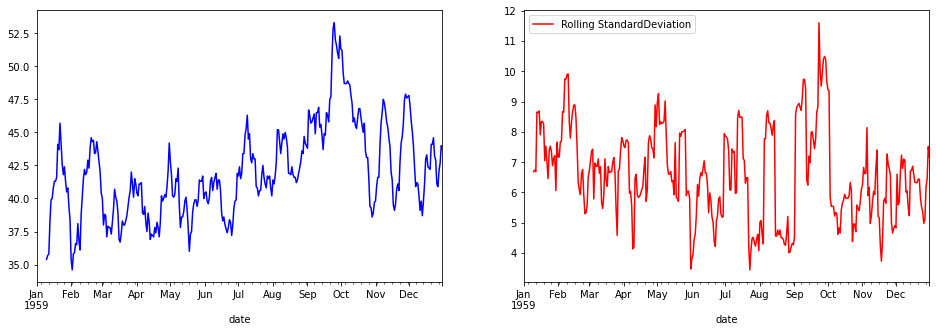

In [44]:
test_for_stationality(df=df)

<AxesSubplot:xlabel='date'>

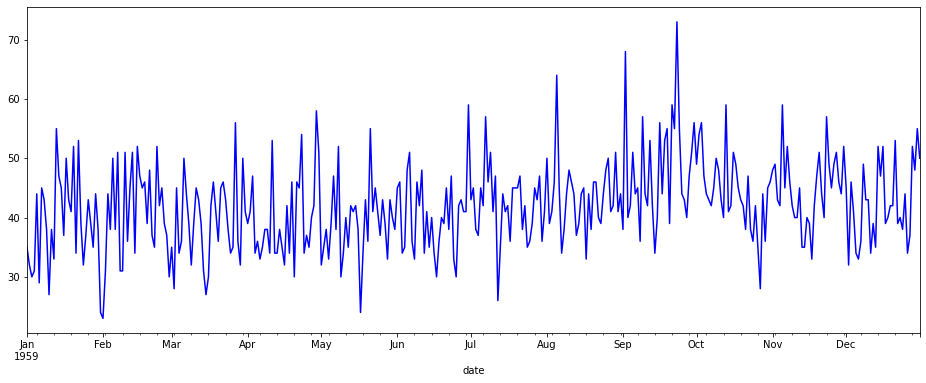

In [40]:
df.births.plot(color="b", figsize=(16,6), label="Birth Counts")

# Smoothening Data

Moving Average - Rolling Mean

<AxesSubplot:xlabel='date'>

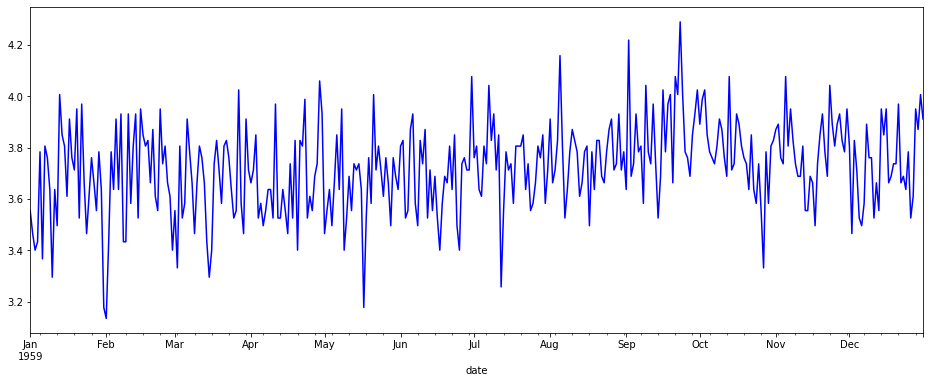

In [47]:
log_transformed = np.log(df.births)
log_transformed.plot(color="b", figsize=(16, 6), label="Birth Counts")

# Models Available For TimeSeriess Analysis

1. BaseLine Model - A True Reflector of Historical Data
2. Exponential Model
3. AutoRegressor Model
4. Moving Average Model
5. ARIMA Model (AutoRegressor + Intregation + Moving Average) Combined
6. SARIMA Model (Whenever Your Dataset is More Seasonal Trend)
7. SARIMAX Model

# BaseLine Model (Naive Based)

In [53]:
df["baseline_predictions"] = df.births.shift(1)
df.head(10)

,births,baseline_predictions
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0
1959-01-07,45,29.0
1959-01-08,43,45.0
1959-01-09,38,43.0


<AxesSubplot:xlabel='date'>

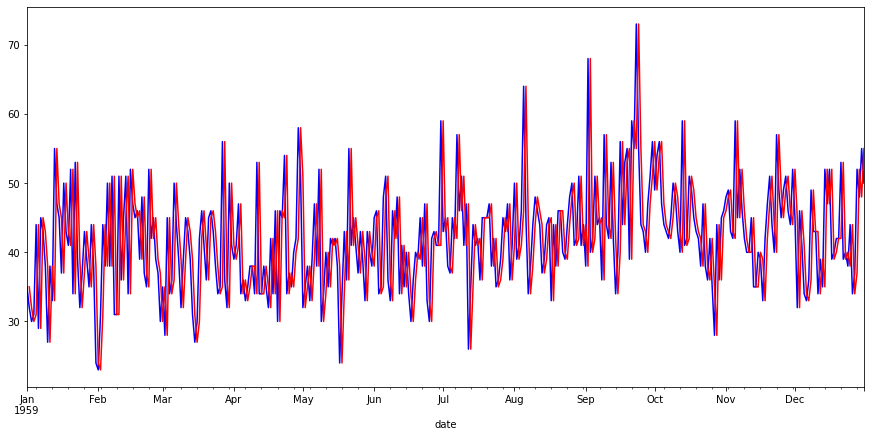

In [59]:
plt.figure(figsize=(15,7))
plt.title = "Baseline Model Prediction"
df.births.plot(color="b")
df.baseline_predictions.plot(color="r")

In [67]:
from sklearn.metrics import mean_squared_error, accuracy_score
np.sqrt(mean_squared_error(y_true=df.births[1:], y_pred=df.baseline_predictions[1:]))

9.177283229394606